In [ ]:
# Q1: How to prepare data for machine learning?
# 1. Load data
# 2. Select good features
# 3. Derive features from existing ones
# 4. Clean data
# 5. Scale data

In [ ]:
# Q2: How to start data preparation?
# Go http://tensorflow.fastowl.xyz
# NOTE: #1 This requires a github account.
# NOTE: #2 This opens a new browser tab/window, so come back here by looking for the correct browser tab/window.

In [ ]:
# Q3: How to use use playground?
# 1. Start 'Python' in your Jupyter notebook
# 2. Input python code
# 3. Run code
# 4. See execution result

In [2]:
# Q4: How to load data?
import pandas
dataframe = pandas.read_csv('./data/train.csv')

In [ ]:
# Q5: How to upload data file?
# 1. Select 'Upload'
# 2. Select file & click 'Open'
# 3. Click 'Upload' to complete
# 4. Upload done

In [3]:
# Q6: How to show data headers?
dataframe.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# Q7: How to select good features?
# Guidelines for feature selection:
# * The discrete features are not overly unique
# * Continuous features once grouped/binned are not overly unique
# * There are few empty or invalid values for that feature
# * If the feature has few empty values or if many empty values, they can be derived, e.g., for numeric fields, they can be empty values can be replaced by average, etc.
# * Determine if there is a correlation between a field and the outcome you want to predict

In [7]:
# Q8: How to determine feature uniqueness?
# Convert all columns to 'str' before calling 'describe()' to get 'unique'
dataframe_str = pandas.DataFrame()
for col in dataframe.columns:
  dataframe_str[col] = dataframe[col].map(lambda c: str(c))
dataframe_str.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891,891,891,891,891,891,891,891,891,891,891,891
unique,891,2,3,891,2,89,7,7,681,248,148,4
top,818,0,3,"Augustsson, Mr. Albert",male,nan,0,0,347082,8.05,nan,S
freq,1,549,491,1,577,177,608,678,7,43,687,644


In [6]:
# Q9: How to get dataframe size?
# The shape should be (891, 12)
# There are:
# * 891 rows of data
# * 12 columns/features 
dataframe.shape

(891, 12)

In [5]:
# Q10: How to show dataframe column types?
# * All columns/features of type 'object' that have almost as many 'unique' values as data row count
#   we need to further preprocess before using
# * All columns/features of type 'object', 'int64' that have few 'unique' values are likely 'discrete'
# * All columns/features of type 'int64' or 'float64' that have almost as many 'unique' values as data row count
#   are likely 'continuous', and can be 'binned', i.e., 0-10, 11-20, etc.
dataframe.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
# Q11: Does <feature column name> affect <outcome column name>?
# From Q8, Q9, Q10, we can gather that:
# outcome column name:
# * Survived, which we want to predict is 'discrete', either 0, or 1
# feature column name:
# * discrete: Pclass, Sex, SipSp, Parch, Embarked
# * continuous bin: Age, Fare
# * need preprocessing: Name, Ticket, Cabin

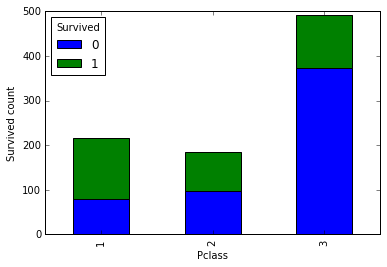

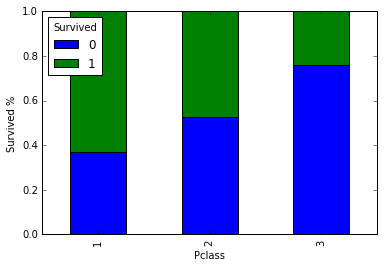

In [9]:
# Q11a: Does Pclass affect Survived?
# NOTE: We are plotting outcome Survived, which is 'discrete' against a feature 'Pclass', which is 'discrete'
%matplotlib inline
dataframe_1 = dataframe.groupby(['Pclass','Survived'])['Survived'].count().unstack('Survived')
# Plot Survived absolute values
axis_1 = dataframe_1.plot(kind='bar', stacked=True)
axis_1.set_ylabel('Survived count')
axis_1.set_xlabel('Pclass')
# Plot Survived percentages
total_by_Pclass = dataframe_1.sum(axis=1)
dataframe_2 = dataframe_1.divide(total_by_Pclass, axis=0)
axis_2 = dataframe_2.plot(kind='bar', stacked=True)
axis_2.set_ylabel('Survived %')
axis_2.set_xlabel('Pclass')

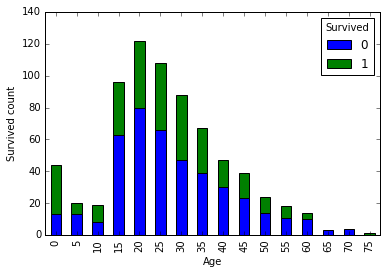

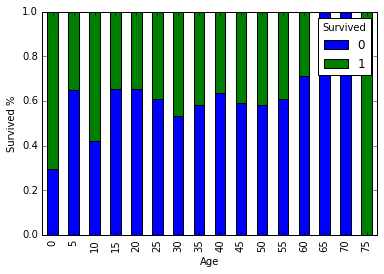

In [10]:
# Q11b: Does Age affect Survived?
# NOTE: We are plotting outcome Survived, which is 'discrete' against a feature 'Pclass', which is 'continuous bin'
import math
max_size = dataframe['Age'].max()
bin_size = 5
# bins will contain [0, 5, 10, ... ]
bins = [i for i in range(0,math.ceil(max_size+bin_size),bin_size)]
# labels will same as bin except one element less at the end
labels = bins[0:-1]
dataframe['AgeBin'] = pandas.cut(dataframe['Age'], bins=bins, labels=labels)
# Plot Survived absolute values
dataframe_1 = dataframe.groupby(['AgeBin', 'Survived'])['Survived'].count().unstack('Survived').fillna(0)
axis_1 = dataframe_1.plot(kind='bar',stacked=True)
axis_1.set_ylabel('Survived count')
axis_1.set_xlabel('Age')
# Plot Survived percentages
total_by_Age = dataframe_1.sum(axis=1)
dataframe_2 = dataframe_1.divide(total_by_Age, axis=0)
axis_2 = dataframe_2.plot(kind='bar', stacked=True)
axis_2.set_ylabel('Survived %')
axis_2.set_xlabel('Age')

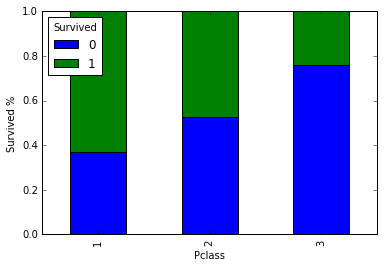

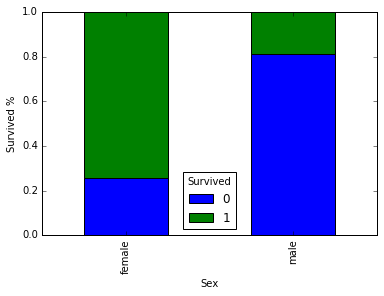

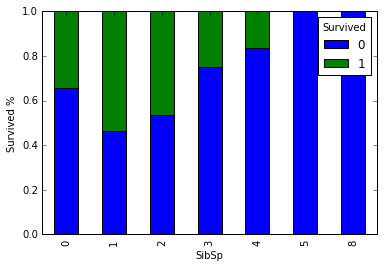

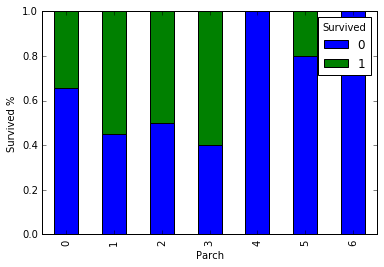

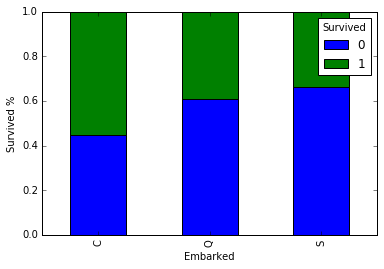

In [14]:
# We repeat for all 'discrete features'
# But we create only percentage plots
discrete_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
for f in discrete_features:
    dataframe_1 = dataframe.groupby([f,'Survived'])['Survived'].count().unstack('Survived')
    # Plot Survived percentages
    total_by_f = dataframe_1.sum(axis=1)
    dataframe_2 = dataframe_1.divide(total_by_f, axis=0)
    axis_2 = dataframe_2.plot(kind='bar', stacked=True)
    axis_2.set_ylabel('Survived %')
    axis_2.set_xlabel(f)

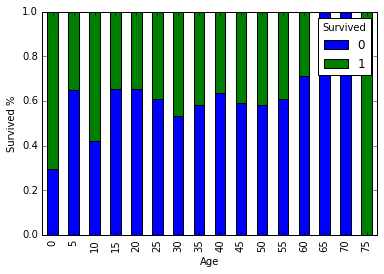

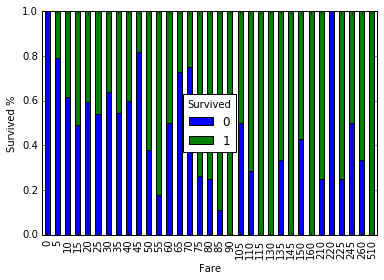

In [15]:
# We repeat for all 'continuous bin features'
# But we create only percentage plots
import math
continuous_bin_features = ['Age', 'Fare']
for f in continuous_bin_features:
    max_size = dataframe[f].max()
    bin_size = 5
    # bins will contain [0, 5, 10, ... ]
    bins = [i for i in range(0,math.ceil(max_size+bin_size),bin_size)]
    # labels will same as bin except one element less at the end
    labels = bins[0:-1]
    dataframe[f+'Bin'] = pandas.cut(dataframe[f], bins=bins, labels=labels)
    dataframe_1 = dataframe.groupby([f+'Bin', 'Survived'])['Survived'].count().unstack('Survived').fillna(0)
    # Plot Survived percentages
    total_by_Age = dataframe_1.sum(axis=1)
    dataframe_2 = dataframe_1.divide(total_by_Age, axis=0)
    axis_2 = dataframe_2.plot(kind='bar', stacked=True)
    axis_2.set_ylabel('Survived %')
    axis_2.set_xlabel(f)